In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import EdgeDetection as Edges


## Meros 1: Edge detection 
###### 1.1

(<matplotlib.image.AxesImage at 0x1b81b218a88>,
 Text(0.5, 1.0, 'Noisy image PSNR=10dB'))

<Figure size 432x288 with 0 Axes>

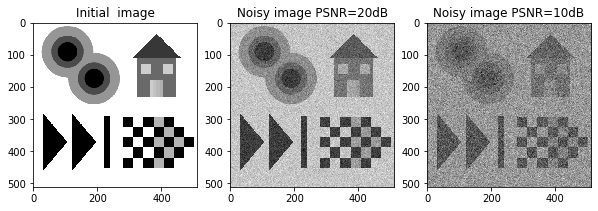

In [2]:
path = 'C:\\Users\\Andrew\\Desktop\\cv20_lab1_parts1&2_material\\edgetest_20.png'
img = cv2.imread(path,0)
img = img.astype(np.float)/255
#1.1.2
# i) PSNR = 20dB

PSNR = 20
sigma = (img.max() - img.min()) / pow(10,(PSNR / 20)) 
noise = np.random.normal(0,sigma,img.shape)
image20 = img + noise 

# ii) PSNR = 10dB

PSNR = 10
sigma = (img.max() - img.min()) / pow(10,(PSNR / 20)) 
noise = np.random.normal(0,sigma,img.shape)
image10 = img + noise 

# plot results
plt.figure()
fig, ax = plt.subplots(1, 3, figsize = (10,40))
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Initial  image')
ax[1].imshow(image20, cmap='gray'),ax[1].set_title('Noisy image PSNR=20dB')
ax[2].imshow(image10, cmap='gray'),ax[2].set_title('Noisy image PSNR=10dB')



### 1.2 Εφαρμογή Αλγορίθμων Ανίχνευσης Ακμών

(<matplotlib.image.AxesImage at 0x16f42827648>,
 Text(0.5, 1.0, 'Non-linear convolution, PSNR=20dB'))

<Figure size 432x288 with 0 Axes>

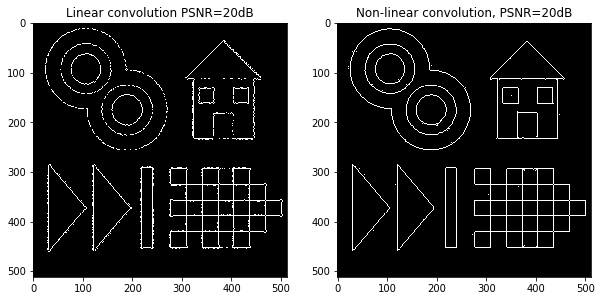

In [10]:
# Apply edge detection function on image with noise which has PSNR = 20dB
Linear_edges20 = Edges.edgedetection(image20,sigma = 1.6,theta_edge = 0.18, lapl_type = 'Linear')
NonLinearedges20 = Edges.edgedetection(image20,sigma =2,theta_edge = 0.1, lapl_type = 'Non_Linear')
plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (10,40))
ax[0].imshow(Linear_edges20, cmap='gray'), ax[0].set_title('Linear convolution PSNR=20dB')
ax[1].imshow(NonLinearedges20, cmap='gray'),ax[1].set_title('Non-linear convolution, PSNR=20dB')


(<matplotlib.image.AxesImage at 0x16f42938f88>,
 Text(0.5, 1.0, 'Non-linear convolution,PSNR=10dB'))

<Figure size 432x288 with 0 Axes>

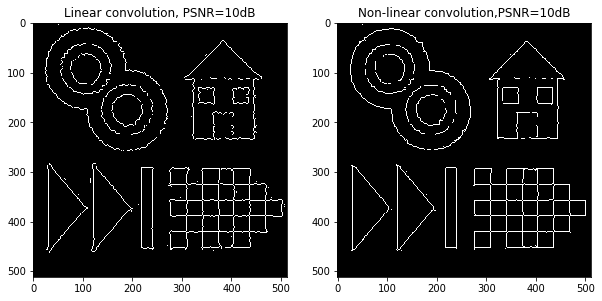

In [11]:
# Apply edge detection function on image with noise which has PSNR = 10dB
Linear_edges10 = Edges.edgedetection(image10,sigma =3.2,theta_edge = 0.19, lapl_type = 'Linear')
NonLinearedges10 = Edges.edgedetection(image10,sigma =3 ,theta_edge = 0.21, lapl_type = 'Non_Linear')

plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (10,40))
ax[0].imshow(Linear_edges10, cmap='gray'), ax[0].set_title('Linear convolution, PSNR=10dB')
ax[1].imshow(NonLinearedges10, cmap='gray'),ax[1].set_title('Non-linear convolution,PSNR=10dB')

### 1.3. Αξιολόγηση των Αποτελεσμάτων Ανίχνευσης Ακμών


In [13]:
# 1.3 Αξιολόγηση των Αποτελεσμάτων Ανίχνευσης Ακμών
# for linear convolution
kern = np.array([
            [0,1,0],
            [1,1,1],
            [0,1,0]
        ], dtype=np.uint8)  # B 
dilated_img = cv2.dilate(img, kern)
eroded_img = cv2.erode(img,kern)
M = dilated_img - eroded_img
theta_real = 0.1
T = M > theta_real

# 1.3.
# Για την εικόνα με PSNR = 20dB και για γραμμική προσέγγιση της Laplacian
D_and_T20 = Linear_edges20 & T
recall = D_and_T20.sum()/T.sum()
precision = D_and_T20.sum()/Linear_edges20.sum()
C = (precision + recall)/2
print('Image with PSNR = 20dB for noise and linear approximation of Laplacian')
print('Presion:',precision)
print('Recall:',recall)
print('C:',C)
print('\n')

# Για την εικόνα με PSNR = 20dB και για μη γραμμική προσέγγιση της Laplacian
D_and_T_nonLinear20 = NonLinearedges20 & T
recall = D_and_T_nonLinear20.sum()/T.sum()
precision = D_and_T_nonLinear20.sum()/NonLinearedges20.sum()
C = (precision + recall)/2

print('Image with PSNR = 20dB for noise and non-linear approximation of Laplacian')
print('Presion:',precision)
print('Recall:',recall)
print('C:',C)
print('\n')

# Για την εικόνα με PSNR = 10dB και για γραμμική προσέγγιση της Laplacian
D_and_T10 = Linear_edges10 & T
recall = D_and_T10.sum()/T.sum()
precision = D_and_T10.sum()/Linear_edges10.sum()
C = (precision + recall)/2
print('Image with PSNR = 10dB for noise and linear approximation of Laplacian')
print('Presion:',precision)
print('Recall:',recall)
print('C:',C)
print('\n')

# Για την εικόνα με PSNR = 10dB και για μη γραμμική προσέγγιση της Laplacian
D_and_T_nonLinear10 = NonLinearedges10 & T
recall = D_and_T_nonLinear10.sum()/T.sum()
precision = D_and_T_nonLinear10.sum()/NonLinearedges10.sum()
C = (precision + recall)/2

print('Image with PSNR = 10dB for noise and non-linear approximation of Laplacian')
print('Presion:',precision)
print('Recall:',recall)
print('C:',C)


Image with PSNR = 20dB for noise and linear approximation of Laplacian
Presion: 0.7746716066015493
Recall: 0.7398472054684359
C: 0.7572594060349926


Image with PSNR = 20dB for noise and non-linear approximation of Laplacian
Presion: 0.9646093349290477
Recall: 0.907438681141938
C: 0.9360240080354929


Image with PSNR = 10dB for noise and linear approximation of Laplacian
Presion: 0.6670144322726482
Recall: 0.6169682348210695
C: 0.6419913335468589


Image with PSNR = 10dB for noise and non-linear approximation of Laplacian
Presion: 0.861825872400423
Recall: 0.7864897466827503
C: 0.8241578095415867


ΙΙ) Αξιολόγηση των αποτελεσμάτων ανίχνευσης ακμών χρησιμοποιώντας μη-γραμμική προσέγγιση για την Laplacian

### 1.4. Εφαρμογή των Αλγορίθμων Ανίχνευσης Ακμών σε Πραγματικές εικόνες

(<matplotlib.image.AxesImage at 0x1b81b973508>,
 Text(0.5, 1.0, 'Edges, non-linear convolution'))

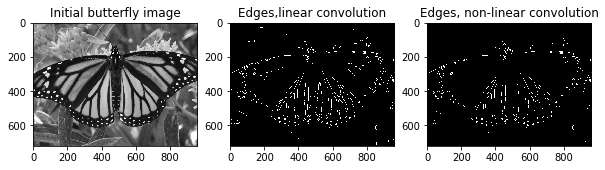

In [5]:
# 1.4 Apply on real images
path = 'C:\\Users\\Andrew\\Desktop\\cv20_lab1_parts1&2_material\\butterfly.jpg'
image = cv2.imread(path,0)
image = image.astype(np.float)/255
# apply edge detection function
edge_butterfly_L = Edges.edgedetection(image,sigma = 1.7,theta_edge = 0.38, lapl_type = 'Linear')
edge_butterfly_N = Edges.edgedetection(image,sigma = 1.9,theta_edge = 0.48, lapl_type = 'Non-Linear')
fig, ax = plt.subplots(1, 3, figsize = (10,40))
ax[0].imshow(image, cmap='gray'), ax[0].set_title('Initial butterfly image')
ax[1].imshow(edge_butterfly_L, cmap='gray'),ax[1].set_title('Edges,linear convolution')
ax[2].imshow(edge_butterfly_N, cmap='gray'),ax[2].set_title('Edges, non-linear convolution')


Ενδεικτικά αποτελέσματα στην ανίχνευση ακμών κρατώντας κάθε φορά τη μια παράμετρο σταθερή και μεταβάλλοντας την δεύτερη τόσο για γραμμική όσο και για μη γραμμική προσέγγιση της Laplacian of Gaussian.

(<matplotlib.image.AxesImage at 0x1b81c93cf88>,
 Text(0.5, 1.0, 'sigma=2 theta=0.23'))

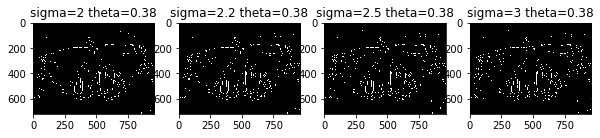

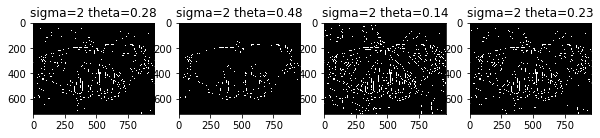

In [16]:
edge1 = Edges.edgedetection(image,sigma = 2,theta_edge = 0.38, lapl_type = 'Linear')
edge2 = Edges.edgedetection(image,sigma = 2.2,theta_edge = 0.38, lapl_type = 'Linear')
edge3 = Edges.edgedetection(image,sigma = 2.5,theta_edge = 0.38, lapl_type = 'Linear')
edge4 = Edges.edgedetection(image,sigma = 3,theta_edge = 0.38, lapl_type = 'Linear')
edge5 = Edges.edgedetection(image,sigma = 2,theta_edge = 0.28, lapl_type = 'Linear')
edge6 = Edges.edgedetection(image,sigma = 2,theta_edge = 0.48, lapl_type = 'Linear')
edge7 = Edges.edgedetection(image,sigma = 2,theta_edge = 0.14, lapl_type = 'Linear')
edge8 = Edges.edgedetection(image,sigma = 2,theta_edge = 0.23, lapl_type = 'Linear')
fig, ax = plt.subplots(1, 4, figsize = (10,40))
ax[0].imshow(edge1, cmap='gray'), ax[0].set_title('sigma=2 theta=0.38')
ax[1].imshow(edge2, cmap='gray'),ax[1].set_title('sigma=2.2 theta=0.38')
ax[2].imshow(edge3, cmap='gray'),ax[2].set_title('sigma=2.5 theta=0.38')
ax[3].imshow(edge4, cmap='gray'),ax[3].set_title('sigma=3 theta=0.38')
fig, ax = plt.subplots(1, 4, figsize = (10,40))
ax[0].imshow(edge5, cmap='gray'),ax[0].set_title('sigma=2 theta=0.28')
ax[1].imshow(edge6, cmap='gray'),ax[1].set_title('sigma=2 theta=0.48')
ax[2].imshow(edge7, cmap='gray'),ax[2].set_title('sigma=2 theta=0.14')
ax[3].imshow(edge8, cmap='gray'),ax[3].set_title('sigma=2 theta=0.23')

(<matplotlib.image.AxesImage at 0x1b81d337a08>,
 Text(0.5, 1.0, 'sigma=1.9 theta=0.53'))

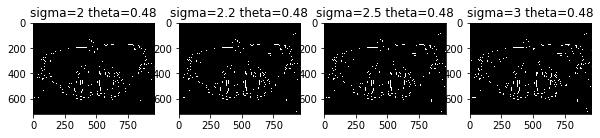

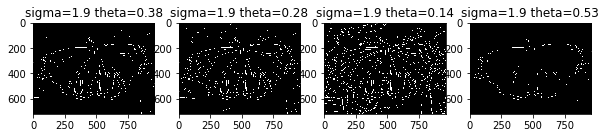

In [17]:
edge1 = Edges.edgedetection(image,sigma = 2,theta_edge = 0.48, lapl_type = 'Non-Linear')
edge2 = Edges.edgedetection(image,sigma = 2.2,theta_edge = 0.48, lapl_type = 'Non-Linear')
edge3 = Edges.edgedetection(image,sigma = 2.5,theta_edge = 0.48, lapl_type = 'Non-Linear')
edge4 = Edges.edgedetection(image,sigma = 3,theta_edge = 0.48, lapl_type = 'Non-Linear')
edge5 = Edges.edgedetection(image,sigma = 1.9,theta_edge = 0.38, lapl_type = 'Non-Linear')
edge6 = Edges.edgedetection(image,sigma = 1.9,theta_edge = 0.28, lapl_type = 'Non-Linear')
edge7 = Edges.edgedetection(image,sigma = 1.9,theta_edge = 0.14, lapl_type = 'Non-Linear')
edge8 = Edges.edgedetection(image,sigma = 1.9,theta_edge = 0.53, lapl_type = 'Non-Linear')
fig, ax = plt.subplots(1, 4, figsize = (10,40))
ax[0].imshow(edge1, cmap='gray'), ax[0].set_title('sigma=2 theta=0.48')
ax[1].imshow(edge2, cmap='gray'),ax[1].set_title('sigma=2.2 theta=0.48')
ax[2].imshow(edge3, cmap='gray'),ax[2].set_title('sigma=2.5 theta=0.48')
ax[3].imshow(edge4, cmap='gray'),ax[3].set_title('sigma=3 theta=0.48')
fig, ax = plt.subplots(1, 4, figsize = (10,40))
ax[0].imshow(edge5, cmap='gray'),ax[0].set_title('sigma=1.9 theta=0.38')
ax[1].imshow(edge6, cmap='gray'),ax[1].set_title('sigma=1.9 theta=0.28')
ax[2].imshow(edge7, cmap='gray'),ax[2].set_title('sigma=1.9 theta=0.14')
ax[3].imshow(edge8, cmap='gray'),ax[3].set_title('sigma=1.9 theta=0.53')